In [7]:
import pandas as pd
from liwc import Liwc
from matplotlib import pyplot as plt

import sys
sys.path.append('../utils/')
from data import *
from liwc import *

In [8]:
plt.rcParams['axes.labelsize']  = 10 # fontes no tamanho usado no template
plt.rcParams['axes.titlesize']  = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['font.family'] = 'serif'
# plt.rcParams['text.usetex'] = True
plt.rcParams['lines.linewidth'] = 2

In [9]:
plt.style.use('tableau-colorblind10') # use um estilo colorblind!
plt.ion()

---

In [10]:
def liwc_sentence_parse(s,liwc):
    return liwc.parse(s.split(' '))

def get_key_counts(counter,key):
    if key in counter:
        return counter[key]
    else:
        return 0

LIWC_FILEPATH = '../data/LIWC2015_English_Flat.dic'
liwc = Liwc(LIWC_FILEPATH)

df = get_movies_dataset()
df['liwc_count'] = df['text_clean'].apply(liwc_sentence_parse, args=(liwc,))
df['bad_words_count'] = df['tags_count'].apply(get_key_counts,args=(' __ ',))

display(df.head(), df.shape)

,movie,age,group,has-en-sub,url,id,text,text_clean,tags_count,liwc_count,bad_words_count
0,Black Panther,2018,White Man,0,https://www.youtube.com/watch?v=A_yiL6YB7LE&ab...,A_yiL6YB7LE,I saw black panther and if I looked stoned out...,I saw black panther and if I looked stoned out...,{'Music': 2},"{'verb': 276, 'percept': 73, 'see': 55, 'focus...",0
1,Black Panther,2018,White Man,0,https://www.youtube.com/watch?v=7Usr96nwjqI&ab...,7Usr96nwjqI,Black Panther was directed by Ryan Coogler and...,Black Panther was directed by Ryan Coogler and...,"{' __ ': 1, 'Music': 1}","{'function': 1091, 'auxverb': 196, 'verb': 322...",1
2,Black Panther,2018,White Man,0,https://www.youtube.com/watch?v=BQtPELpog1o&ab...,BQtPELpog1o,[Music] either guys how are you so let's talk ...,either guys how are you so let's talk about B...,{'Music': 3},"{'adj': 92, 'compare': 63, 'quant': 47, 'cogpr...",0
3,Black Panther,2018,Black Man,0,https://www.youtube.com/watch?v=Wc0pK98d65Q&ab...,Wc0pK98d65Q,this movie started up so well and crashed and ...,this movie started up so well and crashed and ...,{},"{'function': 1795, 'pronoun': 584, 'ipron': 25...",0
4,Black Panther,2018,Black Man,0,https://www.youtube.com/watch?v=UVwBpHknNzY&ab...,UVwBpHknNzY,[Music] well Conda forever what is happening m...,well Conda forever what is happening magnesit...,"{'Music': 3, ' __ ': 7}","{'function': 562, 'adverb': 68, 'affect': 64, ...",7


(635, 11)

In [11]:
df.groupby('group')[['age','bad_words_count']].describe()

age                                                          \
             count         mean        std     min     25%     50%     75%   
group                                                                        
Black Man    105.0  2014.066667  13.503039  1940.0  2016.0  2017.0  2018.0   
Black Woman   45.0  2010.422222  21.904222  1939.0  2016.0  2017.0  2018.0   
White Man    314.0  1998.210191  33.139078  1920.0  1972.0  2017.0  2018.0   
White Woman  171.0  2006.233918  27.026854  1920.0  2015.0  2017.0  2018.0   

                    bad_words_count                                          \
                max           count      mean       std  min  25%  50%  75%   
group                                                                         
Black Man    2020.0           105.0  1.390476  4.738336  0.0  0.0  0.0  0.0   
Black Woman  2019.0            45.0  0.888889  5.515360  0.0  0.0  0.0  0.0   
White Man    2020.0           314.0  0.751592  3.721376  0.0  0.0  0.0  0.0   
White Woman  2020.0           171.0  0.409357  2.611451  0.0  0.0  0.0  0.0   

                   
              max  
group              
Black Man    35.0  
Black Woman  37.0  
White Man    53.0  
White Woman  23.0

In [12]:
#pareto plot

#homens tem mais palavrao que mulheres mas sao menos toxicos

In [13]:
#LIWC data

liwc_df = pd.DataFrame().from_records(df['liwc_count'],index=df['id'])
liwc_df = liwc_df.fillna(0)


#normalizing 
#Normalizando pelo numero de categorias obtidas ????????????????? qual a melhor forma de fazer isso? talvez pelo numero de palavras
liwc_df_norm = (liwc_df[liwc.categories.values()].T * ( 1 / liwc_df[liwc.categories.values()].sum(axis=1) )).T

liwc_df_norm.reset_index(inplace=True)
liwc_df_norm['group'] = df['group']
liwc_df_norm['age'] = df['age']

liwc_df_norm

,id,function,pronoun,ppron,i,we,you,shehe,they,ipron,...,relig,death,informal,swear,netspeak,assent,nonflu,filler,group,age
0,A_yiL6YB7LE,0.194283,0.056498,0.025234,0.002010,0.002233,0.008486,0.009603,0.002903,0.031264,...,0.000000,0.001117,0.002680,0.000000,0.000893,0.000670,0.000670,0.000000,White Man,2018
1,7Usr96nwjqI,0.200625,0.050754,0.018389,0.002023,0.000919,0.002758,0.008275,0.004413,0.032365,...,0.001103,0.001839,0.003862,0.000368,0.000919,0.002023,0.000368,0.000000,White Man,2018
2,BQtPELpog1o,0.187279,0.051628,0.025139,0.003543,0.001518,0.011473,0.007255,0.001350,0.026489,...,0.000169,0.000675,0.002025,0.000337,0.000337,0.001350,0.000337,0.000000,White Man,2018
3,Wc0pK98d65Q,0.189146,0.061538,0.034668,0.001897,0.003899,0.009273,0.014120,0.005479,0.026870,...,0.000316,0.002318,0.005901,0.000738,0.002424,0.000316,0.001897,0.000105,Black Man,2018
4,UVwBpHknNzY,0.183002,0.059915,0.028330,0.005536,0.002279,0.009443,0.007815,0.003256,0.031586,...,0.000326,0.001954,0.008792,0.000977,0.002931,0.002605,0.003256,0.000000,Black Man,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630,csbRjP3GyhQ,0.201066,0.055650,0.024307,0.004904,0.002985,0.004904,0.009168,0.002345,0.031130,...,0.000000,0.000213,0.003198,0.000426,0.000640,0.001279,0.000853,0.000000,White Woman,2017
631,LZqhBeEdGZk,0.191746,0.048064,0.020041,0.002887,0.003567,0.006114,0.004925,0.002548,0.028023,...,0.000170,0.000170,0.003567,0.000679,0.000000,0.000849,0.001698,0.000000,Black Man,2017
632,gJDctCOOhsQ,0.194175,0.054722,0.021183,0.000883,0.001765,0.011474,0.006178,0.000883,0.033539,...,0.001765,0.000000,0.005296,0.003530,0.000000,0.000883,0.000883,0.000000,Black Man,2017
633,wmWStFQp0t0,0.190518,0.064453,0.034091,0.001953,0.003551,0.015625,0.005504,0.007457,0.030362,...,0.000178,0.000178,0.003551,0.000000,0.000710,0.000533,0.001598,0.000000,Black Man,2017


In [14]:
(liwc_df[liwc.categories.values()].T * ( 1 / liwc_df[liwc.categories.values()].sum(axis=1) )).T

,function,pronoun,ppron,i,we,you,shehe,they,ipron,article,...,home,money,relig,death,informal,swear,netspeak,assent,nonflu,filler
id,,,,,,,,,,,,,,,,,,,,,
A_yiL6YB7LE,0.194283,0.056498,0.025234,0.002010,0.002233,0.008486,0.009603,0.002903,0.031264,0.025234,...,0.000223,0.001563,0.000000,0.001117,0.002680,0.000000,0.000893,0.000670,0.000670,0.000000
7Usr96nwjqI,0.200625,0.050754,0.018389,0.002023,0.000919,0.002758,0.008275,0.004413,0.032365,0.028319,...,0.000000,0.000368,0.001103,0.001839,0.003862,0.000368,0.000919,0.002023,0.000368,0.000000
BQtPELpog1o,0.187279,0.051628,0.025139,0.003543,0.001518,0.011473,0.007255,0.001350,0.026489,0.025477,...,0.000675,0.001518,0.000169,0.000675,0.002025,0.000337,0.000337,0.001350,0.000337,0.000000
Wc0pK98d65Q,0.189146,0.061538,0.034668,0.001897,0.003899,0.009273,0.014120,0.005479,0.026870,0.021707,...,0.000527,0.000421,0.000316,0.002318,0.005901,0.000738,0.002424,0.000316,0.001897,0.000105
UVwBpHknNzY,0.183002,0.059915,0.028330,0.005536,0.002279,0.009443,0.007815,0.003256,0.031586,0.018561,...,0.000000,0.000326,0.000326,0.001954,0.008792,0.000977,0.002931,0.002605,0.003256,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
csbRjP3GyhQ,0.201066,0.055650,0.024307,0.004904,0.002985,0.004904,0.009168,0.002345,0.031130,0.030277,...,0.000213,0.001493,0.000000,0.000213,0.003198,0.000426,0.000640,0.001279,0.000853,0.000000
LZqhBeEdGZk,0.191746,0.048064,0.020041,0.002887,0.003567,0.006114,0.004925,0.002548,0.028023,0.026155,...,0.000679,0.001359,0.000170,0.000170,0.003567,0.000679,0.000000,0.000849,0.001698,0.000000
gJDctCOOhsQ,0.194175,0.054722,0.021183,0.000883,0.001765,0.011474,0.006178,0.000883,0.033539,0.031774,...,0.000000,0.002648,0.001765,0.000000,0.005296,0.003530,0.000000,0.000883,0.000883,0.000000


In [15]:
norm_df = liwc_df_norm.groupby('group').mean() - liwc_df_norm.mean()
norm_df

,function,pronoun,ppron,i,we,you,shehe,they,ipron,article,...,money,relig,death,informal,swear,netspeak,assent,nonflu,filler,age
group,,,,,,,,,,,,,,,,,,,,,
Black Man,-0.002193,0.003800,0.002771,0.000157,0.000079,0.001965,0.000055,0.000515,0.001032,-0.002209,...,-0.000073,0.000072,-0.000038,0.001625,0.000208,0.000650,0.000376,0.000351,0.000006,10.208399
Black Woman,-0.002467,0.001767,0.003118,0.000524,0.000515,0.000838,0.000874,0.000367,-0.001390,-0.002665,...,0.000009,0.000033,0.000053,0.001342,0.000030,0.000174,0.000525,0.000483,0.000043,6.563955
White Man,0.001260,-0.000869,-0.001402,-0.000391,-0.000002,-0.000641,-0.000276,-0.000092,0.000537,0.001530,...,0.000037,-0.000119,0.000010,-0.000493,-0.000036,-0.000115,-0.000191,-0.000116,-0.000023,-5.648077
White Woman,-0.000319,-0.001203,0.000051,0.000484,-0.000180,-0.000251,0.000242,-0.000244,-0.001253,-0.000752,...,-0.000025,0.000167,-0.000008,-0.000446,-0.000070,-0.000234,-0.000019,-0.000130,0.000028,2.375650


In [16]:
liwc_df_norm.groupby('group').std()

,function,pronoun,ppron,i,we,you,shehe,they,ipron,article,...,money,relig,death,informal,swear,netspeak,assent,nonflu,filler,age
group,,,,,,,,,,,,,,,,,,,,,
Black Man,0.008391,0.005731,0.005915,0.003533,0.001582,0.003321,0.004017,0.002135,0.004594,0.004540,...,0.000983,0.000660,0.000684,0.002926,0.000683,0.001304,0.001218,0.001652,0.000195,13.503039
Black Woman,0.007173,0.007980,0.007057,0.003975,0.001570,0.003136,0.004057,0.001994,0.004879,0.006121,...,0.000992,0.000509,0.000861,0.002748,0.000443,0.000860,0.001242,0.001724,0.000256,21.904222
White Man,0.007149,0.006954,0.005221,0.003727,0.001459,0.003052,0.004342,0.002031,0.005749,0.005578,...,0.000875,0.000427,0.001020,0.002385,0.000532,0.000794,0.000980,0.001376,0.000186,33.139078
White Woman,0.008795,0.007866,0.006703,0.004777,0.001382,0.003200,0.004533,0.001805,0.005596,0.007557,...,0.000832,0.001605,0.000799,0.002691,0.000377,0.000787,0.000999,0.001606,0.000263,27.026854


In [17]:
import seaborn as sns

In [18]:
norm_df*1000

,function,pronoun,ppron,i,we,you,shehe,they,ipron,article,...,money,relig,death,informal,swear,netspeak,assent,nonflu,filler,age
group,,,,,,,,,,,,,,,,,,,,,
Black Man,-2.192977,3.800223,2.771480,0.157177,0.078557,1.965418,0.055100,0.515227,1.031611,-2.209287,...,-0.073477,0.071889,-0.038405,1.624808,0.208153,0.649738,0.376458,0.351442,0.006006,10208.398950
Black Woman,-2.466737,1.766544,3.118468,0.524372,0.514824,0.838417,0.873768,0.367087,-1.389899,-2.664520,...,0.009009,0.032857,0.052750,1.342029,0.030076,0.174331,0.524971,0.482951,0.042609,6563.954506
White Man,1.260339,-0.868969,-1.401553,-0.391375,-0.001840,-0.640833,-0.275595,-0.091910,0.536718,1.530018,...,0.037051,-0.119487,0.009614,-0.492514,-0.035962,-0.114677,-0.190549,-0.116166,-0.023188,-5648.076634
White Woman,-0.318600,-1.202700,0.051177,0.484160,-0.180337,-0.250738,0.242290,-0.244199,-1.253234,-0.751737,...,-0.025288,0.166620,-0.007955,-0.446473,-0.069693,-0.234262,-0.019411,-0.129579,0.027678,2375.650412


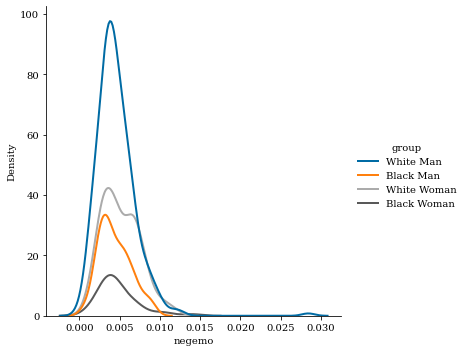

In [19]:
sns.displot(liwc_df_norm, x="negemo", hue="group", kind="kde",)

In [20]:
liwc_df_norm.group.unique()

array(['White Man', 'Black Man', 'White Woman', 'Black Woman'],
      dtype=object)

In [21]:
import scipy.stats as stats

In [22]:
experiments = []

for feature in liwc.categories.values():
    
    result = stats.kruskal(
        liwc_df_norm[liwc_df_norm.group=='White Man'][feature],
        liwc_df_norm[liwc_df_norm.group=='White Woman'][feature],
        liwc_df_norm[liwc_df_norm.group=='Black Man'][feature],
        liwc_df_norm[liwc_df_norm.group=='Black Woman'][feature],
    )
    experiments.append({
        'feature': feature,
        'statistic': result[0] ,
        'pvalue': result[1]
    })

In [23]:
experiments = pd.DataFrame(experiments)
experiments

,feature,statistic,pvalue
0,function,28.057154,3.533080e-06
1,pronoun,48.010799,2.118243e-10
2,ppron,45.032187,9.108104e-10
3,i,17.958295,4.486473e-04
4,we,9.148490,2.738041e-02
...,...,...,...
68,swear,22.687309,4.691995e-05
69,netspeak,50.039023,7.837751e-11
70,assent,40.037720,1.046072e-08
71,nonflu,21.192390,9.602142e-05


In [19]:
experiments[experiments['pvalue']<0.02].sort_values('pvalue')

,feature,statistic,pvalue
67,informal,74.686843,4.228852e-16
16,adj,71.763330,1.789008e-15
20,quant,71.128511,2.446718e-15
15,verb,64.870731,5.345773e-14
9,article,57.542783,1.968062e-12
13,conj,54.565959,8.497762e-12
5,you,53.971551,1.137846e-11
69,netspeak,50.039023,7.837751e-11
1,pronoun,48.010799,2.118243e-10
27,social,47.530919,2.679693e-10


In [24]:
sns.displot(liwc_df_norm, x="cogmech", hue="group", kind="ecdf",complementary=True) #dicionario de palavroes do liwc

ValueError: Could not interpret value `cogmech` for parameter `x`

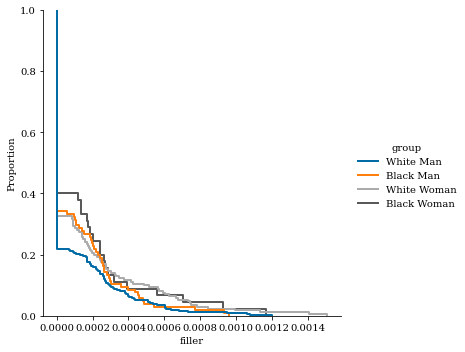

In [49]:
sns.displot(liwc_df_norm, x="filler", hue="group", kind="ecdf",complementary=True) #dicionario de palavroes do liwc

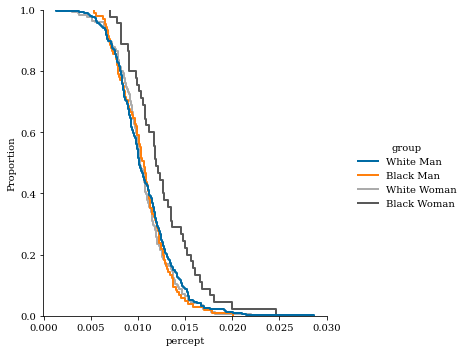

In [44]:
sns.displot(liwc_df_norm, x="percept", hue="group", kind="ecdf",complementary=True) #dicionario de palavroes do liwc

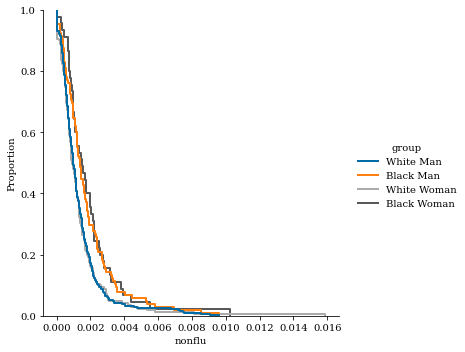

In [33]:
sns.displot(liwc_df_norm, x="nonflu", hue="group", kind="ecdf",complementary=True) #dicionario de palavroes do liwc

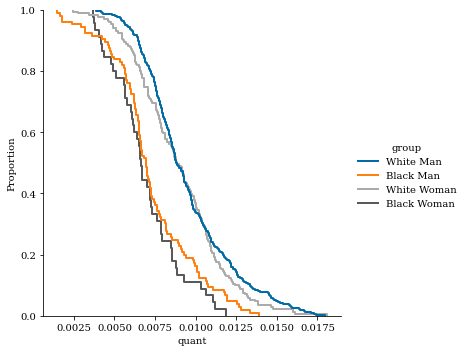

In [25]:
sns.displot(liwc_df_norm, x="quant", hue="group", kind="ecdf",complementary=True) #dicionario de palavroes do liwc

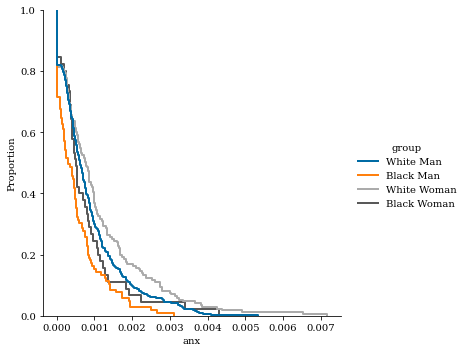

In [21]:
sns.displot(liwc_df_norm, x="anx", hue="group", kind="ecdf",complementary=True)

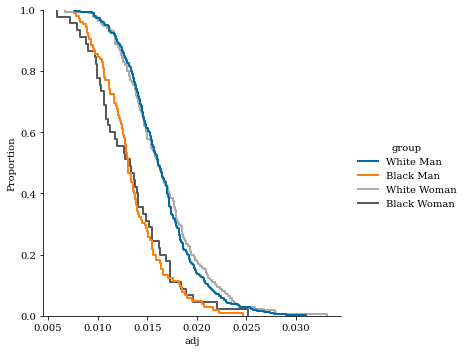

In [22]:
sns.displot(liwc_df_norm, x="adj", hue="group", kind="ecdf",complementary=True) #checar o que sao adjetivos

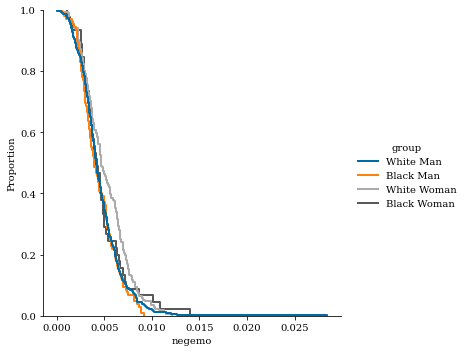

In [23]:
sns.displot(liwc_df_norm, x="negemo", hue='group', kind="ecdf",complementary=True)

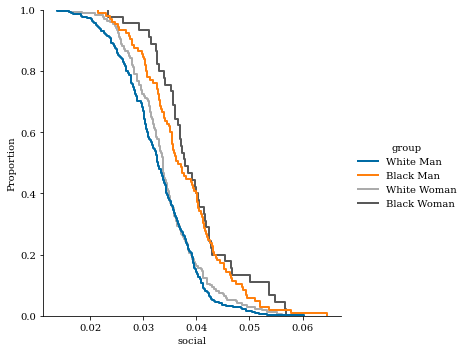

In [24]:
sns.displot(liwc_df_norm, x="social", hue='group', kind="ecdf",complementary=True)

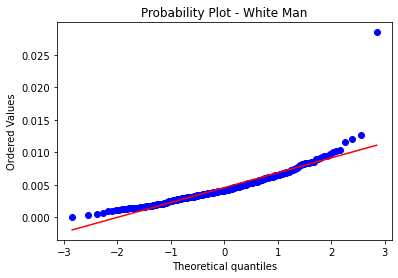

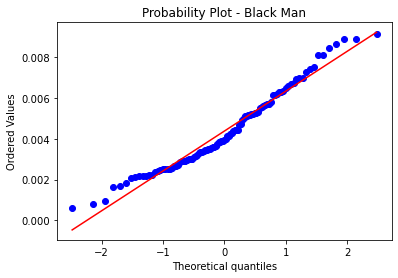

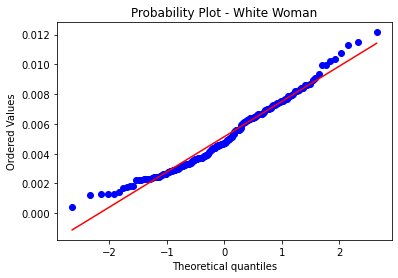

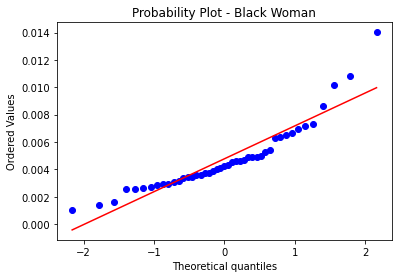

In [99]:
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt

groups = liwc_df_norm['group'].unique()
for group in groups:
    stats.probplot(liwc_df_norm[liwc_df_norm['group'] == group]['negemo'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  group)
    plt.show()

In [12]:
a = df.copy()[['movie','age','group','has-en-sub','liwc_count']]
a[['negemo']] = a['liwc_count'].apply(get_key_counts,args=('negemo',))
a

,movie,age,group,has-en-sub,liwc_count,negemo
0,Black Panther,2018,White Man,0,"{'verb': 276, 'percept': 73, 'see': 55, 'focus...",19
1,Black Panther,2018,White Man,0,"{'function': 1091, 'auxverb': 196, 'verb': 322...",49
2,Black Panther,2018,White Man,0,"{'adj': 92, 'compare': 63, 'quant': 47, 'cogpr...",24
3,Black Panther,2018,Black Man,0,"{'function': 1795, 'pronoun': 584, 'ipron': 25...",77
4,Black Panther,2018,Black Man,0,"{'function': 562, 'adverb': 68, 'affect': 64, ...",12
...,...,...,...,...,...,...
630,Logan,2017,White Woman,0,"{'social': 148, 'drives': 81, 'affiliation': 2...",22
631,Logan,2017,Black Man,0,"{'number': 28, 'relativ': 253, 'time': 105, 's...",51
632,Logan,2017,Black Man,0,"{'percept': 13, 'see': 9, 'focuspresent': 46, ...",7
633,Logan,2017,Black Man,0,"{'social': 255, 'drives': 119, 'affiliation': ...",29


<AxesSubplot:xlabel='group', ylabel='negemo'>

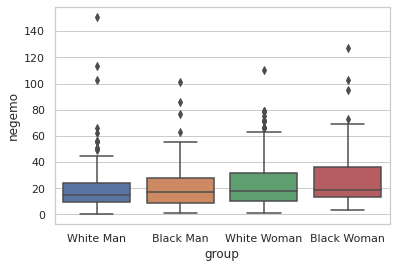

In [51]:
import seaborn as sns
sns.boxplot(x='group',y='negemo',data=a)